In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

# 1. Строим вариационный ряд

In [2]:
numbers = [
    38.3, 23.5, 36.8, 28.3, 26.4, 17.3, 43.5, 19.3, 30.6, 20.1, 27.0, 27.0, 28.1,
    27.9, 19.3, 49.6, 35.9, 24.4, 22.8, 33.1, 16.0, 24.9, 45.6, 34.6, 31.1, 41.5,
    40.3, 29.8, 27.8, 22.1, 25.5, 17.2, 27.8, 41.8, 25.7, 26.8, 23.2, 24.6, 18.5,
    24.4, 37.8, 30.4, 30.1, 16.2, 39.9, 20.2, 31.8, 39.7, 29.2, 21.2, 34.7, 24.8,
    19.9, 22.7, 38.1, 37.6, 31.2, 28.1, 38.0, 27.4
]

In [3]:
variational_series = sorted(numbers)
print(variational_series)

[16.0, 16.2, 17.2, 17.3, 18.5, 19.3, 19.3, 19.9, 20.1, 20.2, 21.2, 22.1, 22.7, 22.8, 23.2, 23.5, 24.4, 24.4, 24.6, 24.8, 24.9, 25.5, 25.7, 26.4, 26.8, 27.0, 27.0, 27.4, 27.8, 27.8, 27.9, 28.1, 28.1, 28.3, 29.2, 29.8, 30.1, 30.4, 30.6, 31.1, 31.2, 31.8, 33.1, 34.6, 34.7, 35.9, 36.8, 37.6, 37.8, 38.0, 38.1, 38.3, 39.7, 39.9, 40.3, 41.5, 41.8, 43.5, 45.6, 49.6]


# 2. Строим интервальный статистический ряд

In [4]:
x0 = variational_series[0]
h = round(variational_series[-1] - variational_series[0]) / (1 + 3.322 * math.log10(len(variational_series)))
intervals = []
while True:
    intervals.append([round(x0, 3), round(x0 + h, 3)])
    x0 += h
    if x0 > variational_series[-1]:
        break
print(intervals)

[[16.0, 20.923], [20.923, 25.845], [25.845, 30.768], [30.768, 35.69], [35.69, 40.613], [40.613, 45.535], [45.535, 50.458]]


In [5]:
n_i = [0] * len(intervals)
for i in range(len(intervals)):
    for j in range(len(variational_series)):
        if variational_series[j] >= intervals[i][0] and variational_series[j] < intervals[i][1]:
            n_i[i] += 1
print(n_i)

[10, 13, 16, 6, 10, 3, 2]


In [6]:
w_i = [0] * len(intervals)
for i in range(len(n_i)):
    w_i[i] = round(n_i[i] / len(variational_series), 3)
print(w_i)

[0.167, 0.217, 0.267, 0.1, 0.167, 0.05, 0.033]


In [7]:
df = pd.DataFrame({'[x_i, x_i+1)': intervals, 'n_i': n_i, 'w_i': w_i})
df

,"[x_i, x_i+1)",n_i,w_i
0,"[16.0, 20.923]",10,0.167
1,"[20.923, 25.845]",13,0.217
2,"[25.845, 30.768]",16,0.267
3,"[30.768, 35.69]",6,0.100
4,"[35.69, 40.613]",10,0.167
5,"[40.613, 45.535]",3,0.050
6,"[45.535, 50.458]",2,0.033


In [8]:
print(df['n_i'].sum() == len(variational_series))
print(df['w_i'].sum())

True
1.0010000000000001


# 3. Строим гистограмму относительных частот и полигон

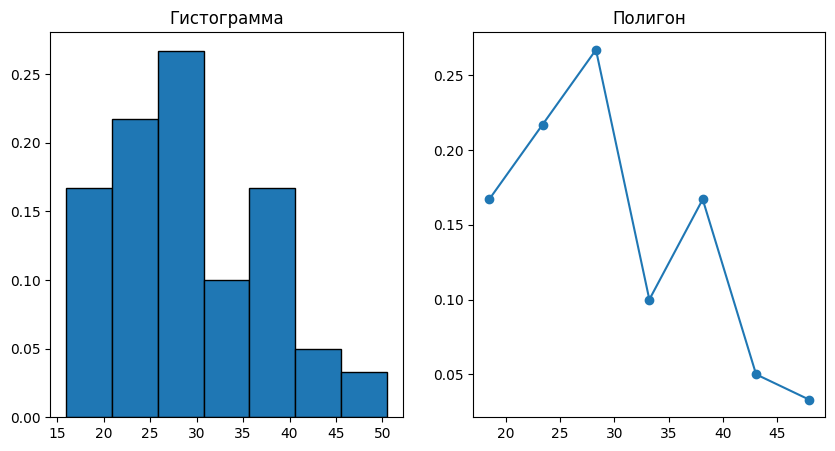

In [9]:
interv = df['[x_i, x_i+1)'].to_list()
interv = np.array([x[0] for x in interv])
center_of_column = [x+(h/2) for x in interv]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
intervals_1 = []
for i in range(len(intervals)):
    intervals_1.append(intervals[i][0])
intervals_1.append(intervals[-1][-1])
axs[0].bar(x=interv+(h/2), height=w_i, width=h, edgecolor='black')
axs[0].set_title("Гистограмма")

axs[1].plot(center_of_column, w_i, marker="o")
axs[1].set_title("Полигон")

plt.show()

# 4. Строим график эмпирической функции распределения

In [10]:
def get_y(variational_series):
    y = []
    for i in range(len(variational_series)):
        y.append(i/len(variational_series))
    return y

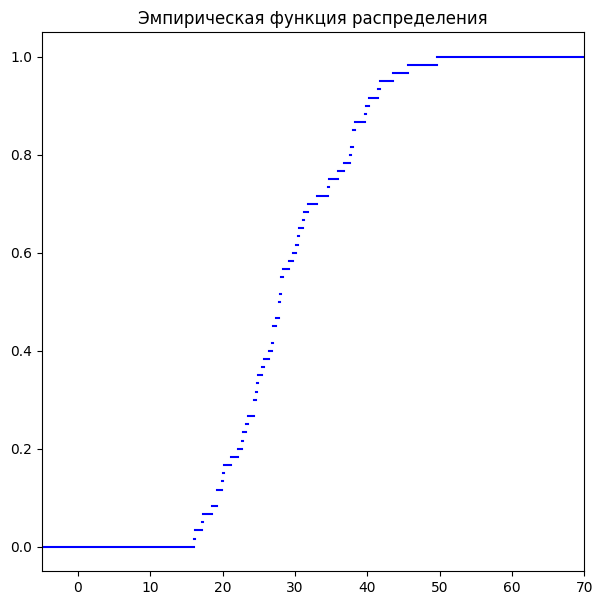

In [11]:
y = get_y(variational_series)

fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(-5, 70)
ax.plot([49.6, 70], [1, 1], color='blue')
ax.plot([-5, 16], [0, 0], color='blue')
ax.set_title("Эмпирическая функция распределения")

for i in range(len(variational_series) - 1):
    ax.plot([variational_series[i], variational_series[i+1]], [y[i+1], y[i+1]], color='blue')

In [12]:
colmog = pd.DataFrame({'x': variational_series, 'y': y})

# 5. Вычисляем выборочные характеристики

In [13]:
n = len(variational_series)

In [14]:
x_sr = round(sum(x for x in variational_series) / n, 2)
print(f"Выборочное среднее: {x_sr}")

Выборочное среднее: 29.12


In [15]:
s = round(sum((x-x_sr) ** 2 for x in variational_series) / (n-1), 2)
print(f"Исправленная выборочная дисперсия: {s}")

Исправленная выборочная дисперсия: 63.55


In [16]:
index = 0
max_count = -1000000
for i in range(len(variational_series)):
    if max_count < variational_series.count(variational_series[i]):
        max_count = variational_series.count(variational_series[i])
        index = i
mode = round(variational_series[index], 2)
print(f"Мода: {mode}")

Мода: 19.3


In [17]:
median = round((variational_series[(n-1)//2] + variational_series[n//2]) / 2, 2)
print(f"Медиана: {median}")

Медиана: 27.85


In [18]:
m_4 = sum((x - x_sr) ** 4 for x in variational_series) / n
excess = round((m_4 / s**2) - 3, 2)
print(f"Эксцесс: {excess}")

Эксцесс: -0.59


In [19]:
m_3 = sum((x - x_sr) ** 3 for x in variational_series) / n
asymmetry = round(m_3 / math.sqrt(s)**3, 2)
print(f"Ассиметрия: {asymmetry}")

Ассиметрия: 0.43


In [20]:
characteristic = pd.DataFrame({"Выборочное среднее": [x_sr], "Исправленная выборочная дисперсия": [s],
                               "Мода": [mode], "Медиана": [median], "Эксцесс": [excess], "Ассиметрия": [asymmetry]})
characteristic

,Выборочное среднее,Исправленная выборочная дисперсия,Мода,Медиана,Эксцесс,Ассиметрия
0,29.12,63.55,19.3,27.85,-0.59,0.43


# 6. Выдвигаем предположение о гипотезе генеральной совокупности

По виду гистограммы и эмпирической функции распределения можно выдвинуть гипотезу о том, что генеральная совокупность подчиняется либо нормальному, либо логнорамльному закону распределения

# 7. Находим оценки параметров предполагаемого распределения генеральной совокупности

In [21]:
a = round(sum(numbers) / len(numbers), 2)

In [22]:
sigma = round((sum((np.array(numbers) - x_sr)**2) / len(numbers)) ** (1/2), 2)

In [23]:
print(a)
print(sigma)

29.12
7.91


In [24]:
a_log = sum(math.log(x) for x in numbers) / len(numbers)

In [25]:
sigma_log = (sum((math.log(x) - a_log)**2 for x in numbers) / (len(numbers)-1)) ** 0.5

In [26]:
print(a_log)
print(sigma_log)

3.334534040478908
0.27599364335493054


# 8. Строим теоретические аналоги функций

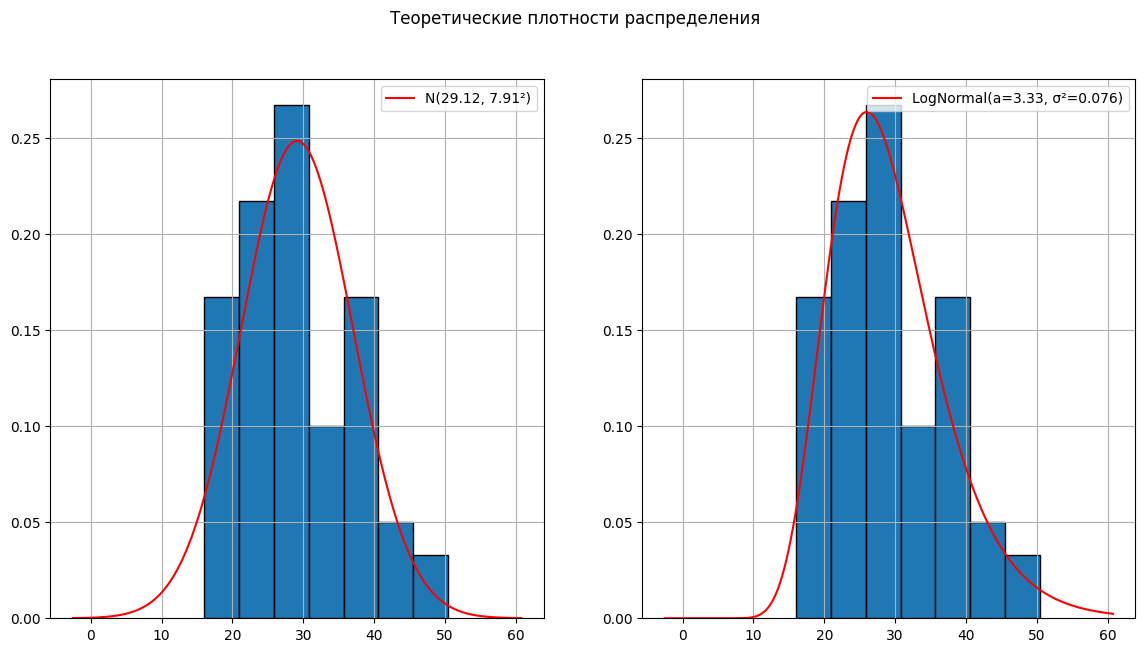

In [27]:
from scipy.stats import norm
from scipy.stats import lognorm

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle("Теоретические плотности распределения")

intervals_1 = []
for i in range(len(intervals)):
    intervals_1.append(intervals[i][0])
intervals_1.append(intervals[-1][-1])
axs[0].bar(x=interv+(h/2), height=w_i, width=h, edgecolor='black')

x = np.linspace(a - 4*sigma, a + 4*sigma, 1000)
y_norm = norm.pdf(x, a, sigma)*h

# Построение графика
axs[0].plot(x, y_norm, label=f'N({a}, {sigma}²)', color="red")
axs[0].grid(True)
axs[0].legend()

intervals_1 = []
for i in range(len(intervals)):
    intervals_1.append(intervals[i][0])
intervals_1.append(intervals[-1][-1])
axs[1].bar(x=interv+(h/2), height=w_i, width=h, edgecolor='black')


scale = np.exp(a_log)
y_lognorm = lognorm.pdf(x, s=sigma_log, scale=scale)*h

axs[1].plot(x, y_lognorm, label=f'LogNormal(a={a_log:.2f}, σ²={sigma_log**2:.3f})', color="red")
axs[1].grid(True)
axs[1].legend()
plt.show()

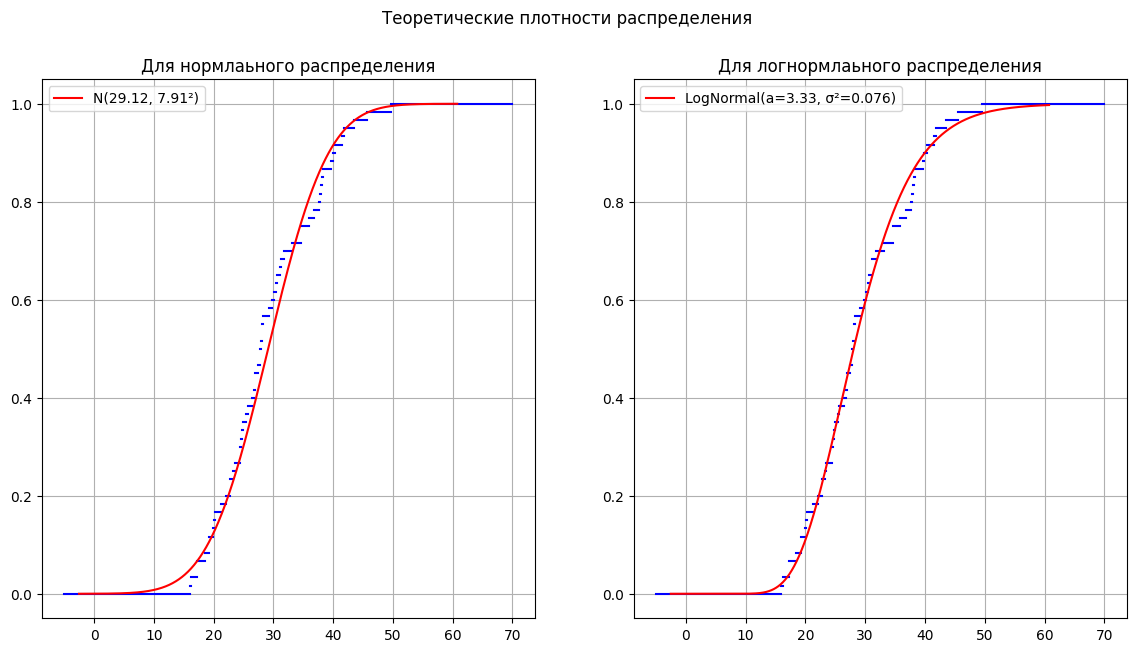

In [28]:
from scipy.stats import norm
from scipy.stats import lognorm

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle("Теоретические плотности распределения")

axs[0].plot([49.6, 70], [1, 1], color='blue')
axs[0].plot([-5, 16], [0, 0], color='blue')
axs[0].set_title("Для нормлаьного распределения")

for i in range(len(variational_series) - 1):
    axs[0].plot([variational_series[i], variational_series[i+1]], [y[i+1], y[i+1]], color='blue')

x = np.linspace(a - 4*sigma, a + 4*sigma, 1000)
y_norm_func = norm.cdf(x, a, sigma)

# Построение графика
axs[0].plot(x, y_norm_func, label=f'N({a}, {sigma}²)', color="red")
axs[0].grid(True)
axs[0].legend()

axs[1].plot([49.6, 70], [1, 1], color='blue')
axs[1].plot([-5, 16], [0, 0], color='blue')
axs[1].set_title("Для логнормлаьного распределения")

for i in range(len(variational_series) - 1):
    axs[1].plot([variational_series[i], variational_series[i+1]], [y[i+1], y[i+1]], color='blue')


scale = np.exp(a_log)
y_lognorm_func = lognorm.cdf(x, s=sigma_log, scale=scale)

axs[1].plot(x, y_lognorm_func, label=f'LogNormal(a={a_log:.2f}, σ²={sigma_log**2:.3f})', color="red")
axs[1].grid(True)
axs[1].legend()
plt.show()

# 9. Проверяем выполнение правила 3-х сигма

In [29]:
mean = np.mean(numbers)
std = np.std(numbers)
three_sigma = (mean - 3*std, mean + 3*std)
count_three_sigma = np.sum((numbers >= three_sigma[0]) & (numbers <= three_sigma[1]))
percent_three_sigma = (count_three_sigma / len(numbers)) * 100
print(f"В интервале ±3σ: {percent_three_sigma:.1f}% (ожидается ≈99.7%)")
print(f"±3σ: [{three_sigma[0]:.4f}, {three_sigma[1]:.4f}]")

В интервале ±3σ: 100.0% (ожидается ≈99.7%)
±3σ: [5.4075, 52.8392]


In [30]:
print(std)
print(mean)

7.905280232575918
29.123333333333335


# 10. Применим критерий согласия Пирсона

In [31]:
sample = sorted(numbers)

In [32]:
print(intervals)
intervals_uninon = intervals.copy()
intervals_uninon[-2][1] = intervals[-1][-1]
del intervals_uninon[-1]
print(intervals_uninon)

[[16.0, 20.923], [20.923, 25.845], [25.845, 30.768], [30.768, 35.69], [35.69, 40.613], [40.613, 45.535], [45.535, 50.458]]
[[16.0, 20.923], [20.923, 25.845], [25.845, 30.768], [30.768, 35.69], [35.69, 40.613], [40.613, 50.458]]


In [33]:
n_i = [0] * len(intervals_uninon)
for i in range(len(intervals_uninon)):
    for j in range(len(variational_series)):
        if variational_series[j] >= intervals[i][0] and variational_series[j] < intervals[i][1]:
            n_i[i] += 1
print(n_i)

[10, 13, 16, 6, 10, 5]


In [34]:
w_i = [0] * len(intervals_uninon)
for i in range(len(n_i)):
    w_i[i] = round(n_i[i] / len(variational_series), 3)
print(w_i)

[0.167, 0.217, 0.267, 0.1, 0.167, 0.083]


In [35]:
df = pd.DataFrame({'[x_i, x_i+1)': intervals_uninon, 'n_i': n_i, 'w_i': w_i})
df

,"[x_i, x_i+1)",n_i,w_i
0,"[16.0, 20.923]",10,0.167
1,"[20.923, 25.845]",13,0.217
2,"[25.845, 30.768]",16,0.267
3,"[30.768, 35.69]",6,0.100
4,"[35.69, 40.613]",10,0.167
5,"[40.613, 50.458]",5,0.083


In [36]:
import scipy.stats as stats
n = len(numbers)
k = len(intervals_uninon)
l = 2
alpha = 0.05
chi2 = sum((n_i[i] - n*w_i[i])**2 / (n*w_i[i]) for i in range(k))
print(f"Наблюдаемая статистика хи-квадрат: {chi2}")

r = k - l - 1
print(f"Число степеней свободы: {r}")
print("Уровень значимости: 0,05")

chi2_critical = stats.chi2.ppf(1 - alpha, r)
print(f"Критическое значение: {chi2_critical}")
print(f"{round(chi2, 4)} < {round(chi2_critical, 1)}, нулевая гипотеза не отвергается")

Наблюдаемая статистика хи-квадрат: 0.00021585235972141468
Число степеней свободы: 3
Уровень значимости: 0,05
Критическое значение: 7.814727903251179
0.0002 < 7.8, нулевая гипотеза не отвергается


In [37]:
import numpy as np
import scipy.stats as stats

a = np.mean(numbers)
sigma = np.std(numbers, ddof=1)
n = len(numbers)
k = int(np.round(1 + 3.322 * np.log10(n)))

# Функция объединения интервалов при малых ожидаемых
def group_bins_until_all_expected_ge_5(numbers, a, sigma, n, max_bins):
    for bins in range(max_bins, 1, -1):
        observed, edges = np.histogram(numbers, bins=bins)
        expected = []
        for i in range(len(edges) - 1):
            prob = stats.norm.cdf(edges[i + 1], a, sigma) - stats.norm.cdf(edges[i], a, sigma)
            expected.append(prob * n)
        expected = np.array(expected)

        if np.all(expected >= 5):
            return observed, expected, edges

    raise ValueError("Не удалось найти разбиение с ожидаемыми >= 5")

# Применяем
observed_counts, expected_counts, bin_edges = group_bins_until_all_expected_ge_5(numbers, a, sigma, n, k)

# Статистика критерия
chi2_stat = np.sum((observed_counts - expected_counts) ** 2 / expected_counts)

# Степени свободы: число интервалов - 1 - число оценённых параметров
df = len(observed_counts) - 1 - 1

# Уровень значимости
alpha = 0.05

# Критическое значение хи-квадрат
chi2_critical = stats.chi2.ppf(1 - alpha, df)

# Вывод
print(f"Chi2-статистика: {chi2_stat:.4f}")
print(f"Степени свободы: {df}")
print(f"Критическое значение (при α = {alpha}): {chi2_critical:.4f}")

if chi2_stat > chi2_critical:
    print("Гипотеза о нормальности отвергается (χ² > критического значения)")
else:
    print("Нет оснований отвергать гипотезу о нормальности (χ² <= критического значения)")

Chi2-статистика: 2.0690
Степени свободы: 1
Критическое значение (при α = 0.05): 3.8415
Нет оснований отвергать гипотезу о нормальности (χ² <= критического значения)


# 10.1 Критерий Колмогорова

In [38]:
from scipy.stats import lognorm

In [39]:
sigma = sigma_log
a = a_log
func = lognorm(s=sigma, scale=np.exp(a_log))

In [40]:
colmog = colmog.rename(columns={"y": "F(x) эмпир."})
colmog["F(x) теор."] = [func.cdf(colmog["x"].iloc[i]) for i in range(colmog.shape[0])]

In [42]:
colmog

,x,F(x) эмпир.,F(x) теор.
0,16.0,0.000000,0.020871
1,16.2,0.016667,0.023237
2,17.2,0.033333,0.038028
3,17.3,0.050000,0.039798
4,18.5,0.066667,0.065516
5,19.3,0.083333,0.087445
6,19.3,0.100000,0.087445
7,19.9,0.116667,0.106431
8,20.1,0.133333,0.113235
9,20.2,0.150000,0.116725


In [44]:
t = (colmog["F(x) эмпир."] - colmog["F(x) теор."]).abs().max()
t

np.float64(0.07202574100788495)

In [45]:
t_cr = 1.3581

In [46]:
nabl = n**(1/2) * t

In [48]:
print(f"Критическое значение: {t_cr}")
print(f"Статистика: {nabl}")
print("1,3581 > 0,55, гипотеза не отвергается")

Критическое значение: 1.3581
Статистика: 0.557908990843574
1,3581 > 0,55, гипотеза не отвергается


# 11. Находим доверительные интервалы для генеральной средней и генерального среднеквадратического отклонения по уровню надежности γ = 0,95

In [43]:
def confidence_intervals(data, confidence=0.95):
    n = len(data)
    
    # Вычисляем выборочные характеристики
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1) 
    
    # Находим критическое значение t-распределения Стьюдента
    t_value = stats.t.ppf(1 - alpha, df=n-1)
    
    # Доверительный интервал для генеральной средней
    mean_error = t_value * (sample_std / np.sqrt(n-1))
    mean_interval = (sample_mean - mean_error, sample_mean + mean_error)
    
    # Находим критические значения хи-квадрат распределения
    gamma = 0.95
    chi2_left = stats.chi2.ppf((1 - gamma) / 2, df=n-1)
    chi2_right = stats.chi2.ppf((1 + gamma) / 2, df=n-1)
    
    # Доверительный интервал для генерального среднеквадратического отклонения
    std_interval = (
        sample_std * np.sqrt((n-1) / chi2_right),
        sample_std * np.sqrt((n-1) / chi2_left)
    )
    
    # Выводим результаты
    print(f"Доверительные интервалы (уровень надежности {confidence:.2f}):")
    print("\nДля генеральной средней:")
    print(f"({mean_interval[0]:.4f}; {mean_interval[1]:.4f})")
    
    print("\nДля генерального среднеквадратического отклонения:")
    print(f"({std_interval[0]:.4f}; {std_interval[1]:.4f})")

    print(stats.t.ppf(1 - 0.05, df=59))
    print(sample_mean)

    print(chi2_left)
    print(chi2_right)
    print(sample_std)
confidence_intervals(numbers)

Доверительные интервалы (уровень надежности 0.95):

Для генеральной средней:
(27.3890; 30.8577)

Для генерального среднеквадратического отклонения:
(6.7573; 9.7231)
1.6710930321038946
29.123333333333335
39.661859351515666
82.1174059402383
7.971992640906454
